In [1]:
# Import packages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords # import other stopword library
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import ngram_graphs
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv("But how does bitcoin actually work.csv",delimiter=";")

In [3]:
comments_cleaned = df.Comment
comments_cleaned.head()

0    If you see comments here about investing or br...
1    I'd recommend not just reporting, but also rep...
2                               Thank you so much Lisa
3    Only a matter of time before scammers come her...
4    Wow I’m already seeing scams scrolling through...
Name: Comment, dtype: object

In [4]:
text = ''.join(comments_cleaned) 
text = text.lower()

# # Sentiment Analysis

In [5]:
import matplotlib.pyplot as plt
import spacy

plt.rcParams['figure.figsize'] = (8, 8)

In [6]:
df['Comment'] = df['Comment'].str.lower()
df.head(10)
corpus = df['Comment']

In [7]:
vc = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vc.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)

(171, 1513)


In [8]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# lemmatize
lem_corpus = corpus.apply(lambda row: ' '.join([t.lemma_ for t in nlp(row) 
                                                if t.lemma_ not in stopwords 
                                                and t.lemma_.isalpha()]))

lem_corpus.head()

0    comment investing broker scam video cryptocurr...
1    I recommend report reply explain potential rea...
2                                           thank lisa
3                    matter time scammer come discount
4                         wow I scam scroll reply lmao
Name: Comment, dtype: object

In [9]:
# Apply Textblob on only slightly processed comments comments
df['Polarity'] = df['Comment'].apply(lambda Comment: TextBlob(Comment).sentiment[0])
df['Subjectivity'] = df['Comment'].apply(lambda Comment: TextBlob(Comment).sentiment[1])
df[0:5]

,User,Comment,Likes,Time,Polarity,Subjectivity
0,3Blue1Brown,if you see comments here about investing or br...,8.2K,1 year ago (edited),0.337216,0.426136
1,Samuel Luce,"i'd recommend not just reporting, but also rep...",246,1 year ago,0.305556,0.833333
2,Rjley Kassya,thank you so much lisa,1,1 year ago,0.200000,0.200000
3,Onions?,only a matter of time before scammers come her...,39,1 year ago,0.000000,1.000000
4,Caden,wow i’m already seeing scams scrolling through...,114,1 year ago,0.350000,1.000000


In [10]:
vc = CountVectorizer()
# Generate matrix of word vectors
bow_matrix = vc.fit_transform(lem_corpus)
# Print the shape of bow_matrix
print(bow_matrix.shape)

(171, 1019)


In [11]:
#df['lem_comment']=lem_corpus

In [12]:
#take the sentiment from the lemmatized comments but keep the original (lowercased) ones in df
df['Polarity'] = lem_corpus.apply(lambda Comment: TextBlob(Comment).sentiment[0])
df['Subjectivity'] = lem_corpus.apply(lambda Comment: TextBlob(Comment).sentiment[1])

In [13]:
df.head(5)

,User,Comment,Likes,Time,Polarity,Subjectivity
0,3Blue1Brown,if you see comments here about investing or br...,8.2K,1 year ago (edited),0.262121,0.401515
1,Samuel Luce,"i'd recommend not just reporting, but also rep...",246,1 year ago,0.166667,0.750000
2,Rjley Kassya,thank you so much lisa,1,1 year ago,0.000000,0.000000
3,Onions?,only a matter of time before scammers come her...,39,1 year ago,0.000000,0.000000
4,Caden,wow i’m already seeing scams scrolling through...,114,1 year ago,0.350000,1.000000


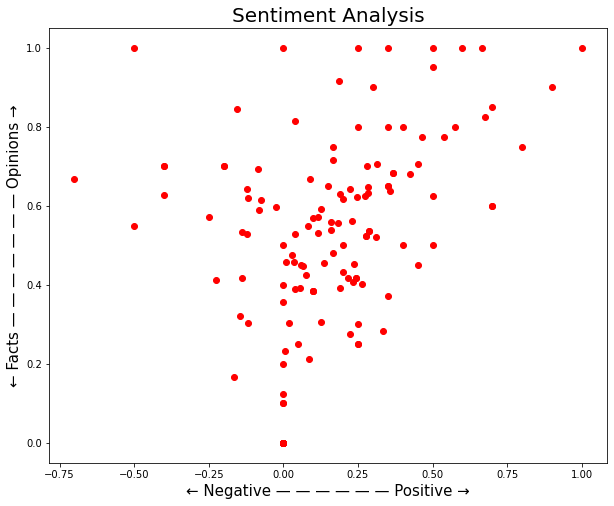

In [14]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Comment in enumerate(df.index):
    x = df.Polarity.loc[Comment]
    y = df.Subjectivity.loc[Comment]
    plt.scatter(x, y, color='Red')

    plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [15]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df['Analysis'] = df['Polarity'].apply(ratio)

def interpret(x):
    if x > 0:
        return 'Positive'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Negative'
df['Interpretation'] = df['Analysis'].apply(interpret)

In [16]:
df.head()

,User,Comment,Likes,Time,Polarity,Subjectivity,Analysis,Interpretation
0,3Blue1Brown,if you see comments here about investing or br...,8.2K,1 year ago (edited),0.262121,0.401515,1,Positive
1,Samuel Luce,"i'd recommend not just reporting, but also rep...",246,1 year ago,0.166667,0.750000,1,Positive
2,Rjley Kassya,thank you so much lisa,1,1 year ago,0.000000,0.000000,0,Neutral
3,Onions?,only a matter of time before scammers come her...,39,1 year ago,0.000000,0.000000,0,Neutral
4,Caden,wow i’m already seeing scams scrolling through...,114,1 year ago,0.350000,1.000000,1,Positive


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

Positive    94
Neutral     54
Negative    23
Name: Interpretation, dtype: int64


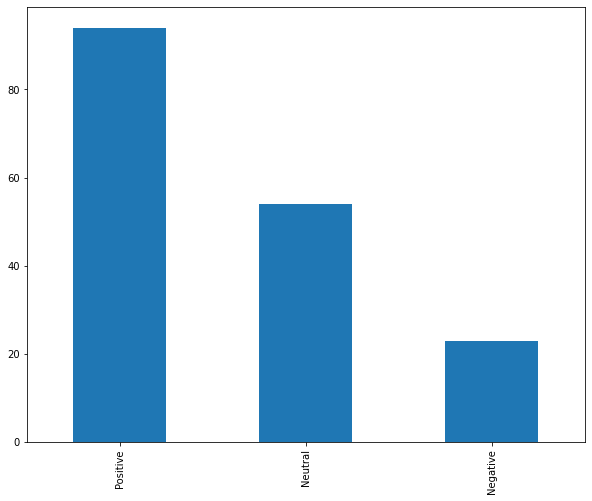

In [18]:
print(df['Interpretation'].value_counts())
# Plotting
blob = df['Interpretation'].value_counts().plot(kind = 'bar')
plt.show()

### Emotion classification using NRC Lexicon

In [19]:
from keras.preprocessing.text import text_to_word_sequence
from nrclex import NRCLex
import seaborn as sns
import matplotlib.colors as mcolors

In [20]:
text_object = NRCLex(text)

In [21]:
print(text_object.raw_emotion_scores)
emotions = text_object.raw_emotion_scores

{'positive': 269, 'disgust': 32, 'fear': 62, 'negative': 117, 'sadness': 49, 'surprise': 56, 'anticipation': 120, 'joy': 96, 'trust': 195, 'anger': 62}


In [22]:
text_object.affect_frequencies

{'fear': 0.05860113421550094,
 'anger': 0.05860113421550094,
 'anticip': 0.0,
 'trust': 0.1843100189035917,
 'surprise': 0.052930056710775046,
 'positive': 0.2542533081285444,
 'negative': 0.11058601134215501,
 'sadness': 0.046313799621928164,
 'disgust': 0.030245746691871456,
 'joy': 0.09073724007561437,
 'anticipation': 0.11342155009451796}

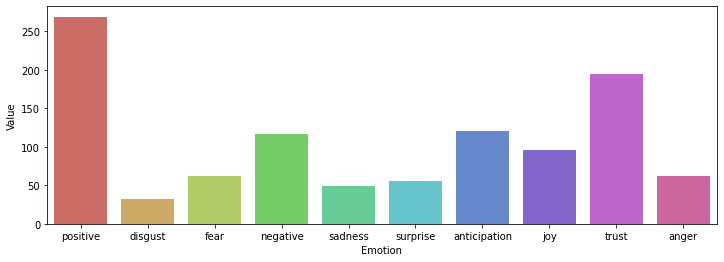

In [78]:
emotions_df = pd.DataFrame.from_dict(emotions.items())
emotions_df.columns = ['Emotion', 'Value']
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
nrc = sns.barplot(x="Emotion",y='Value',palette = sns.color_palette("hls", 10), data=emotions_df)
plt.savefig("emotions.svg", format="svg")

In [24]:
# do the same to the dataframe
df['emotions'] = df['Comment'].apply(lambda x: NRCLex(x).affect_frequencies)
df.head()

,User,Comment,Likes,Time,Polarity,Subjectivity,Analysis,Interpretation,emotions
0,3Blue1Brown,if you see comments here about investing or br...,8.2K,1 year ago (edited),0.262121,0.401515,1,Positive,"{'fear': 0.06666666666666667, 'anger': 0.0, 'a..."
1,Samuel Luce,"i'd recommend not just reporting, but also rep...",246,1 year ago,0.166667,0.750000,1,Positive,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,Rjley Kassya,thank you so much lisa,1,1 year ago,0.000000,0.000000,0,Neutral,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,Onions?,only a matter of time before scammers come her...,39,1 year ago,0.000000,0.000000,0,Neutral,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,Caden,wow i’m already seeing scams scrolling through...,114,1 year ago,0.350000,1.000000,1,Positive,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [25]:
df = pd.concat([df.drop(['emotions'], axis = 1), df['emotions'].apply(pd.Series)], axis = 1)
df.head() # not as precise, because the 'Comment' column was not preprocessed enough with lemmatization and stemming for adequate interpretation

,User,Comment,Likes,Time,Polarity,Subjectivity,Analysis,Interpretation,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,3Blue1Brown,if you see comments here about investing or br...,8.2K,1 year ago (edited),0.262121,0.401515,1,Positive,0.066667,0.0,0.0,0.066667,0.066667,0.466667,0.066667,0.066667,0.066667,0.066667,0.066667
1,Samuel Luce,"i'd recommend not just reporting, but also rep...",246,1 year ago,0.166667,0.750000,1,Positive,0.000000,0.0,0.0,0.400000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000,NaN
2,Rjley Kassya,thank you so much lisa,1,1 year ago,0.000000,0.000000,0,Neutral,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,Onions?,only a matter of time before scammers come her...,39,1 year ago,0.000000,0.000000,0,Neutral,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,Caden,wow i’m already seeing scams scrolling through...,114,1 year ago,0.350000,1.000000,1,Positive,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


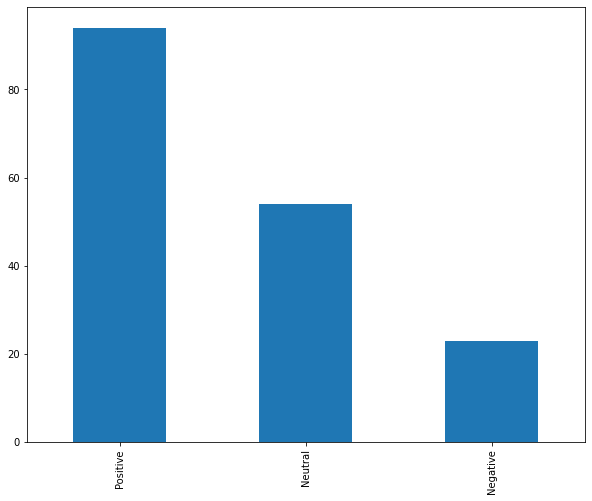

In [26]:
# Plotting
df['Interpretation'].value_counts().plot(kind = 'bar')
plt.show()

In [27]:
nltk_tokens = nltk.word_tokenize(text)
print(nltk_tokens)

['if', 'you', 'see', 'comments', 'here', 'about', 'investing', 'or', 'brokers', ',', 'they', 'are', 'scams', '.', 'videos', 'about', 'cryptocurrencies', ',', 'evidently', 'including', 'ones', 'that', 'are', 'just', 'about', 'the', 'underlying', 'technology/math', ',', 'are', 'hotbeds', 'for', 'attracting', 'nefarious', 'actors', 'preying', 'on', 'the', 'impressionable.also', ',', 'hi', '!', 'if', 'you', '’', 're', 'new', 'to', 'this', 'channel', ',', 'most', 'of', 'it', 'is', 'about', 'visualizing', 'math', '.', 'i', 'get', 'it', ',', 'you', 'probably', 'landed', 'here', 'searching', 'for', 'how', 'btc', 'works', ',', 'not', 'to', 'spend', 'your', 'afternoon', 'getting', 'pulled', 'into', 'learning', 'about', ',', 'say', ',', 'prime', 'numbers', 'or', 'problem-solving', ',', 'but', 'if', 'you', 'have', 'a', 'moment', 'take', 'a', 'look', 'at', 'the', 'rest', 'of', 'the', 'channel', ',', 'you', 'may', 'enjoy', 'what', 'you', 'find.i', "'d", 'recommend', 'not', 'just', 'reporting', ',', 

In [28]:
# tokenize using keras deep learning framework
tokens = text_to_word_sequence(text)
print(tokens) #overall better result

['if', 'you', 'see', 'comments', 'here', 'about', 'investing', 'or', 'brokers', 'they', 'are', 'scams', 'videos', 'about', 'cryptocurrencies', 'evidently', 'including', 'ones', 'that', 'are', 'just', 'about', 'the', 'underlying', 'technology', 'math', 'are', 'hotbeds', 'for', 'attracting', 'nefarious', 'actors', 'preying', 'on', 'the', 'impressionable', 'also', 'hi', 'if', 'you’re', 'new', 'to', 'this', 'channel', 'most', 'of', 'it', 'is', 'about', 'visualizing', 'math', 'i', 'get', 'it', 'you', 'probably', 'landed', 'here', 'searching', 'for', 'how', 'btc', 'works', 'not', 'to', 'spend', 'your', 'afternoon', 'getting', 'pulled', 'into', 'learning', 'about', 'say', 'prime', 'numbers', 'or', 'problem', 'solving', 'but', 'if', 'you', 'have', 'a', 'moment', 'take', 'a', 'look', 'at', 'the', 'rest', 'of', 'the', 'channel', 'you', 'may', 'enjoy', 'what', 'you', 'find', "i'd", 'recommend', 'not', 'just', 'reporting', 'but', 'also', 'replying', 'to', 'them', 'explaining', 'to', 'any', 'potent

In [29]:
# Iterate through list
#for i in range(len(text)):
# 
    # Create object
#    emotion = NRCLex(text[i])
 
    # Classify emotion
#    print('\n\n', text[i], ': ', emotion.top_emotions)

### Sentiment Analysis with Afinn's dictionary

In [30]:
from afinn import Afinn
import statistics
afn = Afinn(emoticons=True)

In [31]:
afn.score(text)

291.0

In [32]:
for token in tokens:
    print('Word:', token)
    print('Predicted Sentiment polarity:', afn.score(token))
    print('-'*60)

Word: if
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: you
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: see
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: comments
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: here
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: about
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: investing
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: or
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: brokers
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: they
Predicted Sentiment polarity

Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: block
Predicted Sentiment polarity: -1.0
------------------------------------------------------------
Word: is
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: seen
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: to
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: be
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: valid
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: and
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: in
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Word: the
Predicted Sentiment polarity: 0.0
-------------------

In [33]:
lem_corpus_df = pd.DataFrame(lem_corpus)
lem_corpus_df

,Comment
0,comment investing broker scam video cryptocurr...
1,I recommend report reply explain potential rea...
2,thank lisa
3,matter time scammer come discount
4,wow I scam scroll reply lmao
...,...
166,thank comment video help trade
167,software teamspeak use proof work security lev...
168,good video far I come explain technicality I l...
169,


In [34]:
#lem_corpus_df['Comment'] = lem_corpus_df['Comment'].astype('string')

In [35]:
lem_corpus_df['Sentiment (Afinn\'s Dictionary)'] = lem_corpus_df['Comment'].apply(afn.score)

In [36]:
lem_corpus_df

,Comment,Sentiment (Afinn's Dictionary)
0,comment investing broker scam video cryptocurr...,0.0
1,I recommend report reply explain potential rea...,2.0
2,thank lisa,2.0
3,matter time scammer come discount,1.0
4,wow I scam scroll reply lmao,6.0
...,...,...
166,thank comment video help trade,4.0
167,software teamspeak use proof work security lev...,-4.0
168,good video far I come explain technicality I l...,12.0
169,,0.0


In [37]:
# save for later use
lem_corpus_df.to_csv('processed_comments.csv')

In [38]:
statistics.mean(lem_corpus_df['Sentiment (Afinn\'s Dictionary)'])

1.7076023391812865

In [39]:
sentiment_polarity = [afn.score(Comment) for Comment in lem_corpus]
predicted_sentiments = ['positive' if score > 0 else 'neutral' if score == 0 else 'negative' for score in sentiment_polarity]

In [40]:
lem_corpus_df['Interpretation']=predicted_sentiments

In [41]:
lem_corpus_df[60:70]

,Comment,Sentiment (Afinn's Dictionary),Interpretation
60,s new I oh hurt,-2.0,negative
61,value,0.0,neutral
62,imaginarybecause realbecause imaginarydue real...,1.0,positive
63,thank great explanation,5.0,positive
64,great video explain bitcoin work understanding...,8.0,positive
65,coin find fee miner pay fee pay send btc minin...,-3.0,negative
66,master piece work thank simplify thing easy un...,3.0,positive
67,,0.0,neutral
68,educational video I watch thank real,2.0,positive
69,,0.0,neutral


positive    86
neutral     53
negative    32
Name: Interpretation, dtype: int64


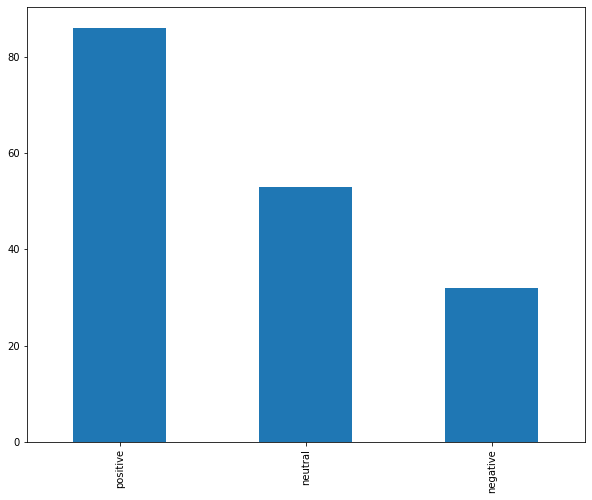

In [42]:
print(lem_corpus_df['Interpretation'].value_counts())
# Plotting
afinn = lem_corpus_df['Interpretation'].value_counts().plot(kind = 'bar')
plt.show()

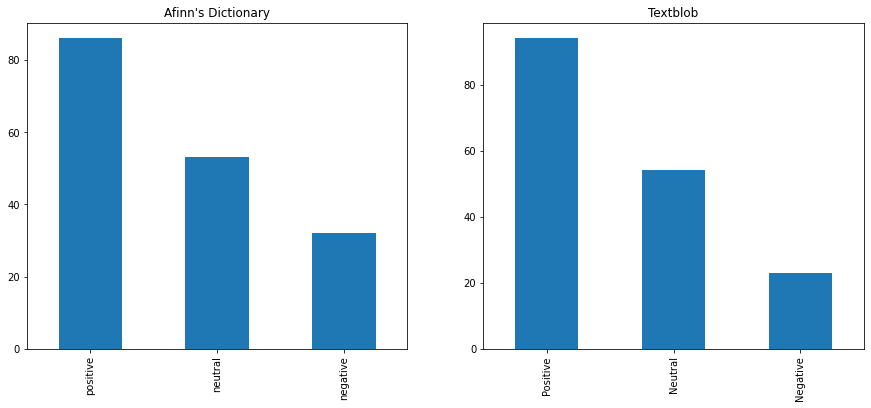

In [74]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1) # row 1, col 2 index 1
lem_corpus_df['Interpretation'].value_counts().plot(kind = 'bar')
plt.title("Afinn's Dictionary")
fig.add_subplot(1, 2, 2) # index 2
df['Interpretation'].value_counts().plot(kind = 'bar')
plt.title("Textblob")
plt.show()
fig.savefig("dictionaries.svg", format="svg")

### Sentiment Analysis using Bing Liu's dictionary will be done in Part 3.2 using R